<a href="https://colab.research.google.com/github/grkidwell/buckwaveforms/blob/master/ccm_waveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buck Waveforms

### Import Libraries



In [1]:
#from scipy import signal

import scipy as sp
import scipy.signal
import scipy.fftpack

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Parameters

In [3]:
Vin = 20
Vout = 6
Iout = 10
fs = 1.0e6
Lout=1e-6

### Functions

In [4]:
duty = Vout/Vin
Ipp = (Vin-Vout)*duty/fs/Lout
Iin_avg = Vout*Iout/Vin

Imon_pp = Ipp*.00462

In [5]:
duty/fs

3e-07

### Time Based Waveforms

In [6]:
print("dutycycle: %3.2f,  Ipp: %3.1f, Imon_pp: %3.4f" % (duty, Ipp, Imon_pp))

dutycycle: 0.30,  Ipp: 4.2, Imon_pp: 0.0194


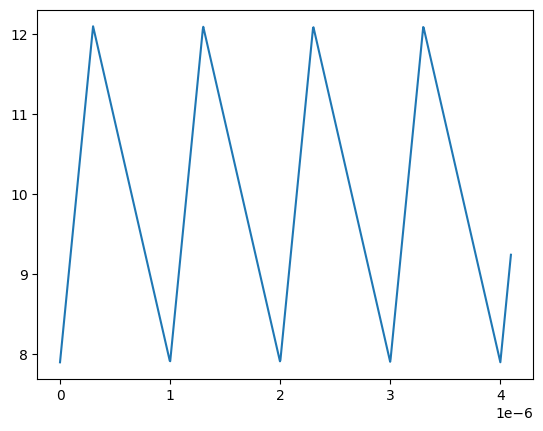

In [7]:
#@title
cycles=4
datapoints=np.linspace(0,1.024,1024)
t=datapoints/fs*cycles
I_inductor=sp.signal.sawtooth(2*np.pi*datapoints*cycles,duty)/2*Ipp+Iout
plt.plot(t,I_inductor)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [8]:
dfactor = {'2level':1,'3level':2}['3level']
D_pulse = sp.signal.square(2*np.pi*datapoints*cycles/dfactor,duty/dfactor)/2+.5

In [9]:
datapoints[1]

np.float64(0.0010009775171065493)

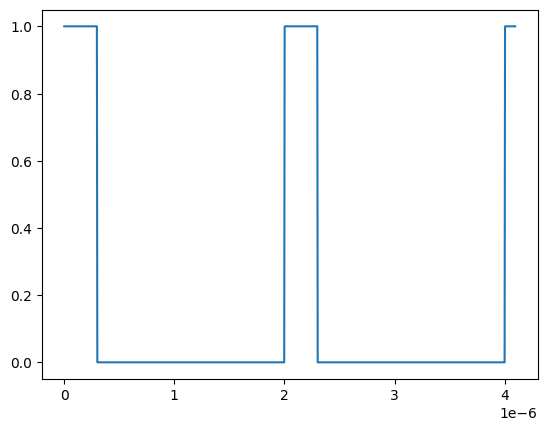

In [10]:
plt.plot(t,D_pulse)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [11]:
I_HSfet = D_pulse*I_inductor
I_LSfet = (1-D_pulse)*I_inductor

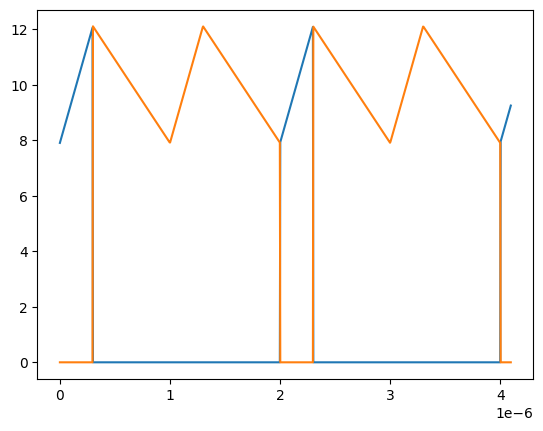

In [12]:
plt.plot(t,I_HSfet)
plt.plot(t,I_LSfet)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [13]:
I_Cin = I_HSfet - Iin_avg
I_Cout = I_inductor - Iout

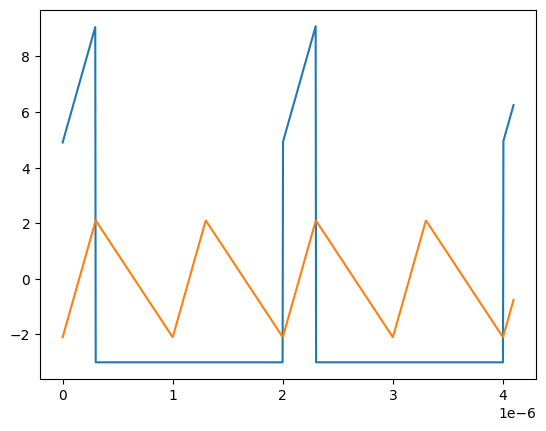

In [14]:
plt.plot(t,I_Cin)
plt.plot(t,I_Cout)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

### FFT

In [15]:
#ind_fft = sp.fftpack.fft(I_inductor[:512])
ind_fft = sp.fftpack.fft(I_Cin[:512])
ind_fft_mag = np.abs(ind_fft)
ampscale=2/ind_fft.size
timestep = t[1]
xticks = np.arange(8)*fs
freq = sp.fftpack.fftfreq(ind_fft.size, timestep)
i=freq>=0

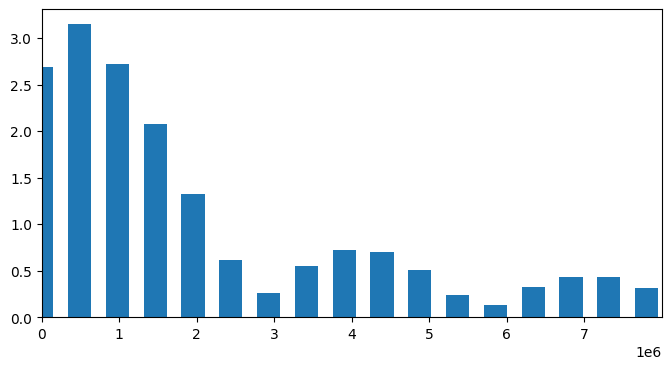

In [16]:
bar_width=300000
fig,ax = plt.subplots(1,1,figsize=(8,4))
rects1=ax.bar(freq[i],ampscale*ind_fft_mag[i],bar_width)
ax.set_xlim(0,8*fs)
ax.set_xticks(xticks)
plt.show()


In [19]:
timestep,ind_fft.size

(np.float64(4.003910068426198e-09), 512)

In [105]:
dummy = np.array([2,5,12,5])
flt=np.array([True, True, False, True])

dummy[flt]


array([2, 5, 5])

In [ ]:
coef=np.array([1,2,1,3])

In [107]:
dummy*coef

array([ 2, 10, 12, 15])